# Wildfire Prediction Project
## Notebook 1) Exploratory Data Analysis (EDA) 

In this notebook, I load the database, extract a dataset, explore the data, and answer different analysis questions. The toold used in this analysis are SQLite, Pandas, Matplotlib, Seaborn

Data Source: https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires?datasetId=2478&sortBy=dateRun&select=FPA_FOD_20170508.sqlite

Below are tasks to be performed in EDA:

1. Importing Libraries
2. Extracting subset of data from database using SQLite
3. Basic Exploration
4. Data cleaning for EDA 
5. Exploratory Data Analysis (EDA) on features

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") 

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading custom functions
import sys
sys.path.append('../scripts')
from Preprocessing import drop_null_30

### 2. Extract dataset

In [3]:
# Creating a western US DataFrame from the database
conn = sqlite3.connect('../../data/SQL/FPA_FOD_20170508.sqlite')
query = '''select * 
           from Fires
           where STATE in ('CA', 'WA', 'OR')'''
df = pd.read_sql_query(query, conn)

In [4]:
df.shape

(284151, 39)

In [5]:
df.head(3)

OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  ... FIRE_SIZE_CLASS  \
0                  0511     Plumas National Forest  ...               A   
1                  0503   Eldorado National Forest  ...               A   
2                  0503   Eldorado National Forest  ...               A   

    LATITUDE   LONGITUDE OWNER_CODE       OWNER_DESCR STATE COUNTY FIPS_CODE  \
0  40.036944 -121.005833        5.0              USFS    CA     63       063   
1  38.933056 -120.404444        5.0              USFS    CA     61       061   
2  38.984167 -120.735556       13.0  STATE OR PRIVATE    CA     17       017   

   FIPS_NAME                                              Shape  
0     Plumas  b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...  
1     Placer  b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...  
2  El Dorado  b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...  

[3 rows x 39 columns]

### 3. Basic Exploration

In [6]:
df.describe()

OBJECTID        FOD_ID      FIRE_YEAR  DISCOVERY_DATE  \
count  2.841510e+05  2.841510e+05  284151.000000    2.841510e+05   
mean   8.576252e+05  5.370491e+07    2003.161224    2.452903e+06   
std    5.970932e+05  1.041450e+08       7.020874    2.560461e+03   
min    1.000000e+00  1.000000e+00    1992.000000    2.448622e+06   
25%    2.322625e+05  2.363595e+05    1997.000000    2.450650e+06   
50%    1.074099e+06  1.309747e+06    2003.000000    2.452858e+06   
75%    1.145136e+06  1.395428e+06    2009.000000    2.455042e+06   
max    1.880465e+06  3.003484e+08    2015.000000    2.457388e+06   

       DISCOVERY_DOY  STAT_CAUSE_CODE     CONT_DATE       CONT_DOY  \
count  284151.000000    284151.000000  1.740220e+05  174022.000000   
mean      204.927261         5.074524  2.453232e+06     208.976440   
std        59.926024         3.651245  2.587901e+03      56.472801   
min         1.000000         1.000000  2.448622e+06       1.000000   
25%       174.000000         2.000000  2.451060e+06     182.000000   
50%       208.000000         4.000000  2.453212e+06     212.000000   
75%       242.000000         9.000000  2.455436e+06     243.000000   
max       366.000000        13.000000  2.457388e+06     366.000000   

           FIRE_SIZE       LATITUDE      LONGITUDE     OWNER_CODE  
count  284151.000000  284151.000000  284151.000000  284151.000000  
mean       91.292581      40.012270    -120.414009       9.185419  
std      2781.685401       4.375595       2.123650       4.589060  
min         0.001000      32.537406    -124.718610       0.000000  
25%         0.100000      36.831944    -122.040454       5.000000  
50%         0.200000      39.473056    -120.718889       8.000000  
75%         1.000000      43.585833    -118.809400      14.000000  
max    558198.300000      49.001130    -114.125800      15.000000

Years are still 1992-2015 even for a subset of the data. That's great!
Fire size ranges from 0.001 - 558198.3 acres, great diversity

In [8]:
df.dtypes

OBJECTID                        int64
FOD_ID                          int64
FPA_ID                         object
SOURCE_SYSTEM_TYPE             object
SOURCE_SYSTEM                  object
NWCG_REPORTING_AGENCY          object
NWCG_REPORTING_UNIT_ID         object
NWCG_REPORTING_UNIT_NAME       object
SOURCE_REPORTING_UNIT          object
SOURCE_REPORTING_UNIT_NAME     object
LOCAL_FIRE_REPORT_ID           object
LOCAL_INCIDENT_ID              object
FIRE_CODE                      object
FIRE_NAME                      object
ICS_209_INCIDENT_NUMBER        object
ICS_209_NAME                   object
MTBS_ID                        object
MTBS_FIRE_NAME                 object
COMPLEX_NAME                   object
FIRE_YEAR                       int64
DISCOVERY_DATE                float64
DISCOVERY_DOY                   int64
DISCOVERY_TIME                 object
STAT_CAUSE_CODE               float64
STAT_CAUSE_DESCR               object
CONT_DATE                     float64
CONT_DOY    

In [9]:
df.isna().sum()

OBJECTID                           0
FOD_ID                             0
FPA_ID                             0
SOURCE_SYSTEM_TYPE                 0
SOURCE_SYSTEM                      0
NWCG_REPORTING_AGENCY              0
NWCG_REPORTING_UNIT_ID             0
NWCG_REPORTING_UNIT_NAME           0
SOURCE_REPORTING_UNIT              0
SOURCE_REPORTING_UNIT_NAME         0
LOCAL_FIRE_REPORT_ID          158780
LOCAL_INCIDENT_ID             116567
FIRE_CODE                     188376
FIRE_NAME                      31604
ICS_209_INCIDENT_NUMBER       279317
ICS_209_NAME                  279317
MTBS_ID                       282001
MTBS_FIRE_NAME                282001
COMPLEX_NAME                  282154
FIRE_YEAR                          0
DISCOVERY_DATE                     0
DISCOVERY_DOY                      0
DISCOVERY_TIME                110105
STAT_CAUSE_CODE                    0
STAT_CAUSE_DESCR                   0
CONT_DATE                     110129
CONT_DOY                      110129
C

In [10]:
#show missing values by %
percent_missing = round(df.isnull().sum() * 100 / len(df))
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values

percent_missing
OBJECTID                                0.0
FOD_ID                                  0.0
FPA_ID                                  0.0
SOURCE_SYSTEM_TYPE                      0.0
SOURCE_SYSTEM                           0.0
NWCG_REPORTING_AGENCY                   0.0
NWCG_REPORTING_UNIT_ID                  0.0
NWCG_REPORTING_UNIT_NAME                0.0
SOURCE_REPORTING_UNIT                   0.0
SOURCE_REPORTING_UNIT_NAME              0.0
LOCAL_FIRE_REPORT_ID                   56.0
LOCAL_INCIDENT_ID                      41.0
FIRE_CODE                              66.0
FIRE_NAME                              11.0
ICS_209_INCIDENT_NUMBER                98.0
ICS_209_NAME                           98.0
MTBS_ID                                99.0
MTBS_FIRE_NAME                         99.0
COMPLEX_NAME                           99.0
FIRE_YEAR                               0.0
DISCOVERY_DATE                          0.0
DISCOVERY_DOY                           0.0
DISCOVERY_TIME                         39.0
STAT_CAUSE_CODE                         0.0
STAT_CAUSE_DESCR                        0.0
CONT_DATE                              39.0
CONT_DOY                               39.0
CONT_TIME                              46.0
FIRE_SIZE                               0.0
FIRE_SIZE_CLASS                         0.0
LATITUDE                                0.0
LONGITUDE                               0.0
OWNER_CODE                              0.0
OWNER_DESCR                             0.0
STATE                                   0.0
COUNTY                                 58.0
FIPS_CODE                              58.0
FIPS_NAME                              58.0
Shape                                   0.0

Other than fire name, all the features with missing values are missing over 39%. It doesn't looks like we will be doing much imputing, but rather just removing these features. 

### 4. Data cleaning for EDA
#### Datetime features
Convert discovery date to datetime format and create day, month, day of week features

In [11]:
# Converting from Julian dates to Gregorian
epoch = pd.to_datetime(0, unit='s').to_julian_date()
df['DISC_GREG_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - epoch, unit='D')
df['CONT_GREG_DATE'] = pd.to_datetime(df['CONT_DATE'] - epoch, unit='D')

# Creating a discovery month feature
df['DISC_MONTH'] = df['DISC_GREG_DATE'].dt.month
# Creating a discovery day feature
df['DISC_DAY'] = df['DISC_GREG_DATE'].dt.day
# Creating a discovery day of week feature
df['DISC_DAYOFWEEK'] = df['DISC_GREG_DATE'].dt.dayofweek

#### Filter by FIPS
Spoiler - later when I add weather features with an API, I keep the FIPS codes to bin the fire locations to reduce the number of API calls. Because of this, I keep only data with FIPS scores for the final model. Let's perform EDA on both the whole dataset and compare to the FIPS filtered data. 

In [15]:
#create df where all null FIPS rows are dropped
df_FIPS = df.dropna(subset='FIPS_CODE', axis = 0)

In [16]:
df_FIPS.shape, df.shape

((119635, 44), (284151, 44))

### 5. Exploratory Data Analysis (EDA) on features

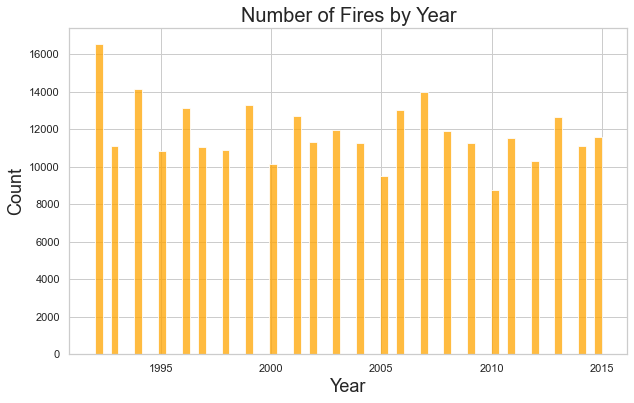

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="FIRE_YEAR", color = 'orange')
plt.title('Number of Fires by Year', size=20)
plt.xlabel('Year', size=18)
plt.ylabel('Count', size=18)
plt.savefig('../../output/figures/FiresbyYear.png', dpi=300)
plt.show()

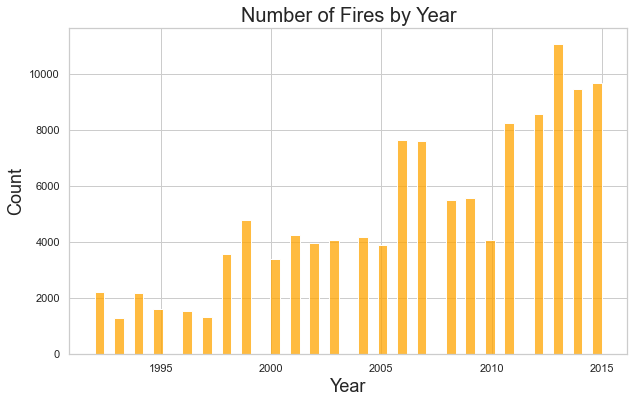

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_FIPS, x="FIRE_YEAR", color = 'orange')
plt.title('Number of Fires by Year', size=20)
plt.xlabel('Year', size=18)
plt.ylabel('Count', size=18)
plt.savefig('../../output/figures/FiresbyYear_FIPS.png', dpi=300)
plt.show()

As we can see, the FIPS features is not equally available for all years. This causes an imbalance in the data set. Unfortunately, this is a tradeoff as we do want to add weather data in an efficient way with API limits.

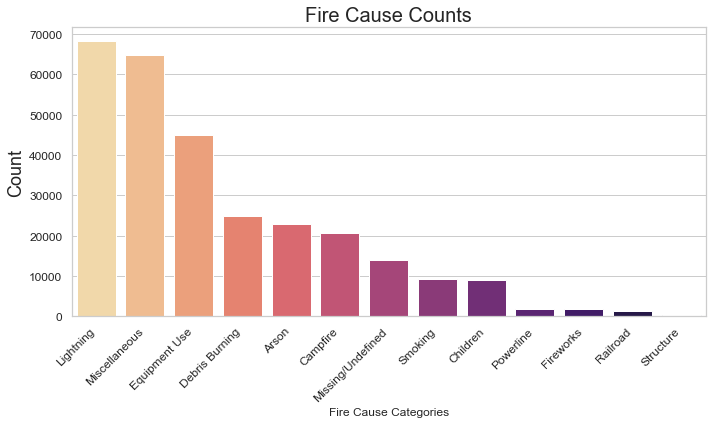

In [25]:
# Bar plot for class imbalance
cause_counts_full = pd.DataFrame(df['STAT_CAUSE_DESCR'].value_counts().reset_index(drop=False))

plt.figure(figsize=(10,6))
sns.barplot(x='index', y='STAT_CAUSE_DESCR', data=cause_counts_full, palette='magma_r')
plt.title('Fire Cause Counts', size=20)
plt.xlabel('Fire Cause Categories')
plt.xticks(rotation=45, size=12, horizontalalignment='right')
plt.ylabel('Count', size=18)
plt.yticks(size=12)
plt.tight_layout()
plt.savefig('../../output/figures/FireCauseCounts.png', dpi=300)
plt.show()

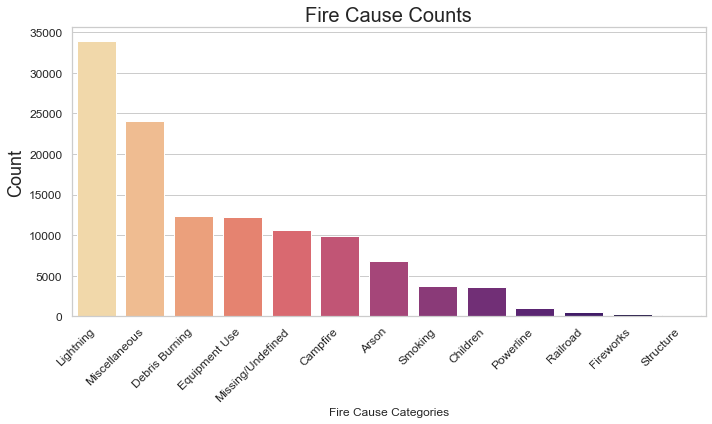

In [26]:
# Bar plot for class imbalance
cause_counts_full = pd.DataFrame(df_FIPS['STAT_CAUSE_DESCR'].value_counts().reset_index(drop=False))

plt.figure(figsize=(10,6))
sns.barplot(x='index', y='STAT_CAUSE_DESCR', data=cause_counts_full, palette='magma_r')
plt.title('Fire Cause Counts', size=20)
plt.xlabel('Fire Cause Categories')
plt.xticks(rotation=45, size=12, horizontalalignment='right')
plt.ylabel('Count', size=18)
plt.yticks(size=12)
plt.tight_layout()
plt.savefig('../../output/figures/FireCauseCounts_FIPS.png', dpi=300)
plt.show()

The Fire Causes are fairly similar with Equipment Use having the most difference between datasets

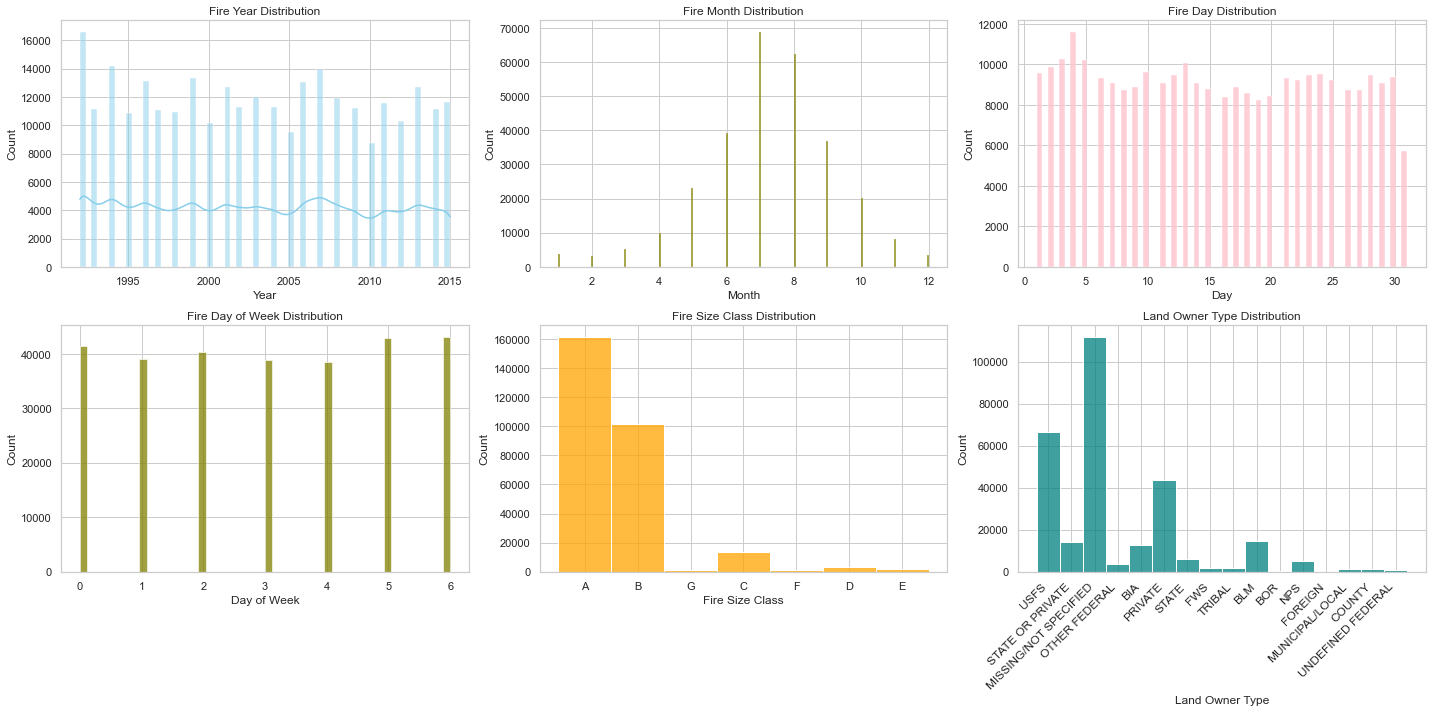

In [30]:
#frequency plots
fig,axs = plt.subplots(2,3, figsize = (20,10))

sns.histplot(data=df, x="FIRE_YEAR", kde=True, color="skyblue", ax=axs[0, 0]).set(title='Fire Year Distribution', xlabel='Year')
sns.histplot(data=df, x="DISC_MONTH", color="olive", ax=axs[0, 1]).set(title='Fire Month Distribution', xlabel='Month')
sns.histplot(data=df, x="DISC_DAY", color="pink", ax=axs[0, 2]).set(title='Fire Day Distribution', xlabel='Day')

sns.histplot(data=df, x="DISC_DAYOFWEEK", color="olive", ax=axs[1, 0]).set(title='Fire Day of Week Distribution', xlabel='Day of Week')
sns.histplot(data=df, x="FIRE_SIZE_CLASS", color="orange", ax=axs[1,1]).set(title='Fire Size Class Distribution', xlabel='Fire Size Class')
sns.histplot(data=df, x="OWNER_DESCR", color="teal", ax=axs[1, 2]).set(title='Land Owner Type Distribution', xlabel='Land Owner Type')
plt.xticks(rotation=45, size=12, horizontalalignment='right')

plt.savefig('../../output/figures/FireFeatureHistograms.png', dpi=300)

fig.tight_layout()

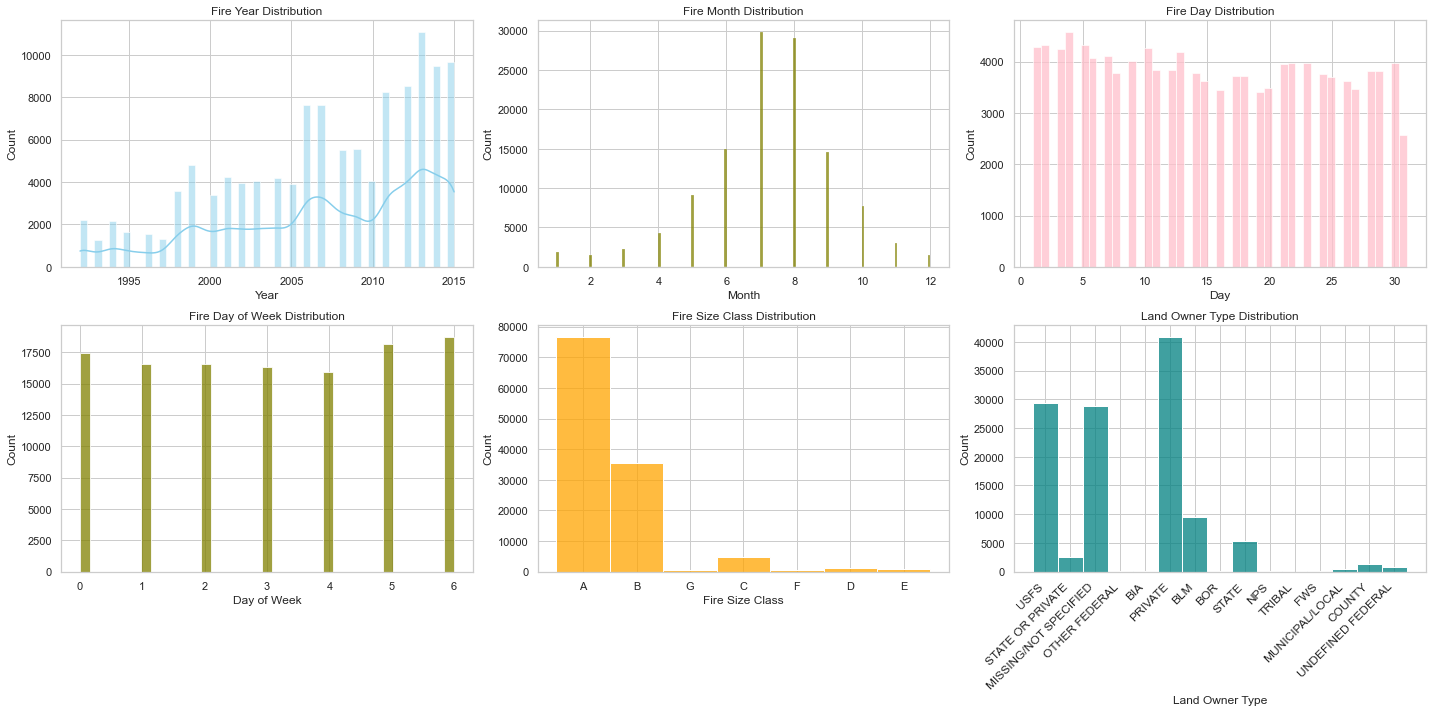

In [31]:
#frequency plots
fig,axs = plt.subplots(2,3, figsize = (20,10))

sns.histplot(data=df_FIPS, x="FIRE_YEAR", kde=True, color="skyblue", ax=axs[0, 0]).set(title='Fire Year Distribution', xlabel='Year')
sns.histplot(data=df_FIPS, x="DISC_MONTH", color="olive", ax=axs[0, 1]).set(title='Fire Month Distribution', xlabel='Month')
sns.histplot(data=df_FIPS, x="DISC_DAY", color="pink", ax=axs[0, 2]).set(title='Fire Day Distribution', xlabel='Day')

sns.histplot(data=df_FIPS, x="DISC_DAYOFWEEK", color="olive", ax=axs[1, 0]).set(title='Fire Day of Week Distribution', xlabel='Day of Week')
sns.histplot(data=df_FIPS, x="FIRE_SIZE_CLASS", color="orange", ax=axs[1,1]).set(title='Fire Size Class Distribution', xlabel='Fire Size Class')
sns.histplot(data=df_FIPS, x="OWNER_DESCR", color="teal", ax=axs[1, 2]).set(title='Land Owner Type Distribution', xlabel='Land Owner Type')
plt.xticks(rotation=45, size=12, horizontalalignment='right')

plt.savefig('../../output/figures/FireFeatureHistograms_FIPS.png', dpi=300)

fig.tight_layout()

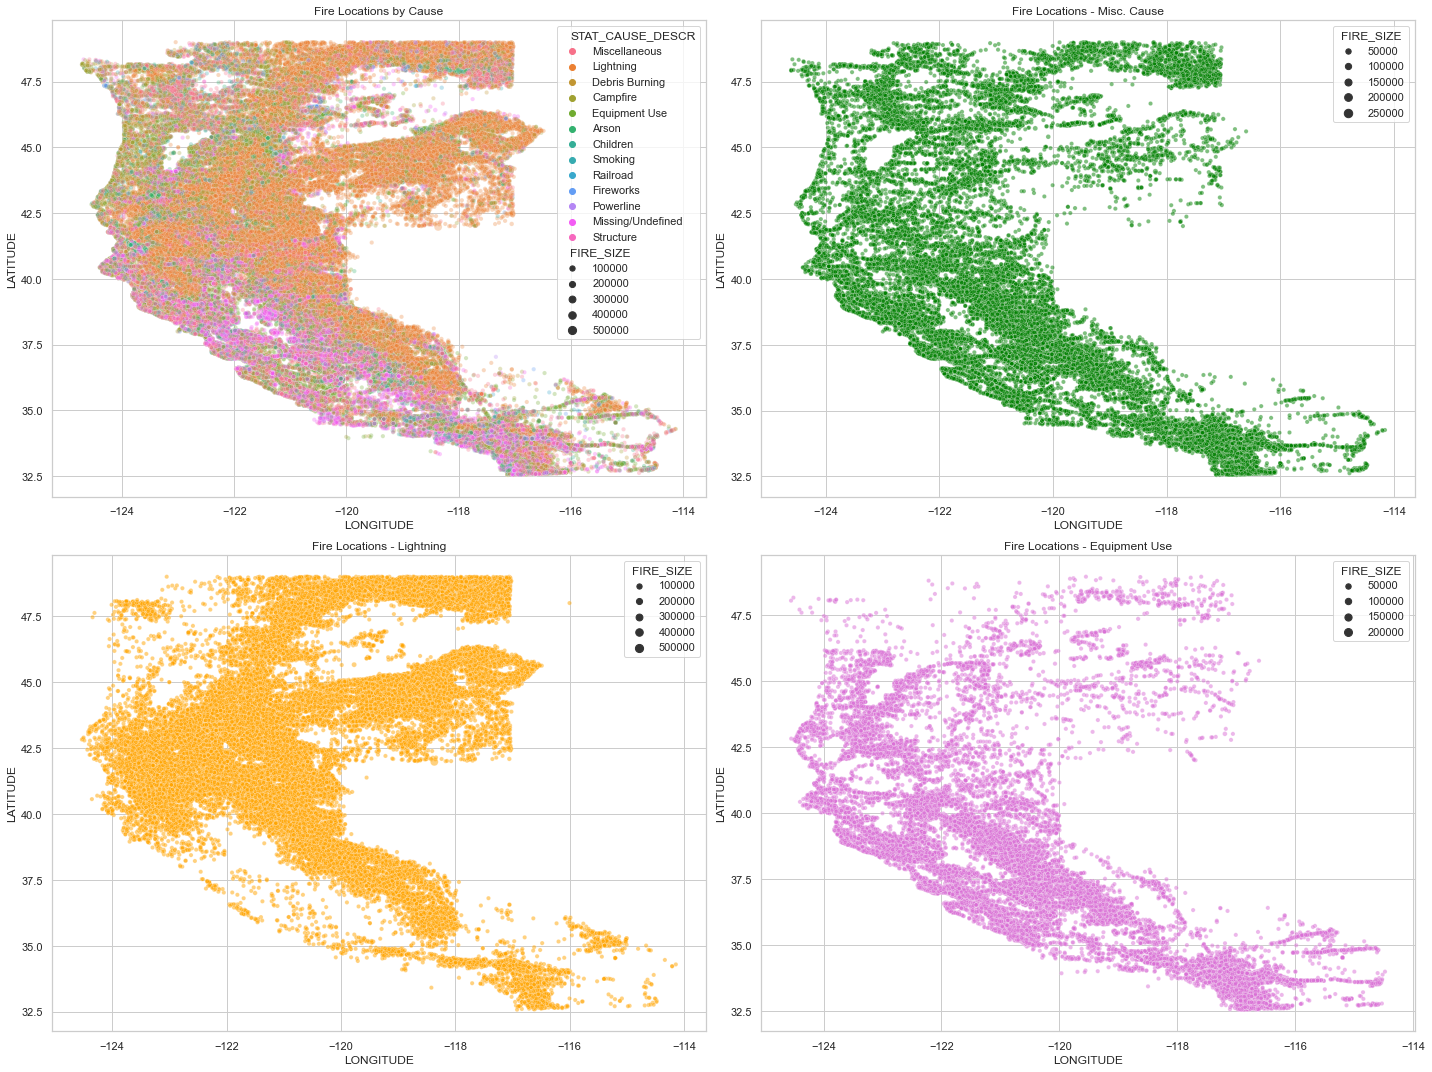

In [32]:
#geo plots of the top 3 causes
fig,axs = plt.subplots(2,2,figsize = (20,15))

sns.scatterplot(data=df, x="LONGITUDE", y="LATITUDE", hue="STAT_CAUSE_DESCR", alpha=.3, size="FIRE_SIZE", ax=axs[0, 0]).set(title='Fire Locations by Cause')  
sns.scatterplot(data=df[df['STAT_CAUSE_DESCR']=='Miscellaneous'], x="LONGITUDE", y="LATITUDE", color = 'green' , alpha=.5, size="FIRE_SIZE", ax=axs[0, 1]).set(title='Fire Locations - Misc. Cause') 

sns.scatterplot(data=df[df['STAT_CAUSE_DESCR']=='Lightning'], x="LONGITUDE", y="LATITUDE", color = 'orange', alpha=.5, size="FIRE_SIZE", ax=axs[1, 0]).set(title='Fire Locations - Lightning') 
sns.scatterplot(data=df[df['STAT_CAUSE_DESCR']=='Equipment Use'], x="LONGITUDE", y="LATITUDE", color = 'orchid', alpha=.5, size="FIRE_SIZE", ax=axs[1,1]).set(title='Fire Locations - Equipment Use') 

plt.savefig('../../output/figures/FireLocations.png', dpi=300)
fig.tight_layout()

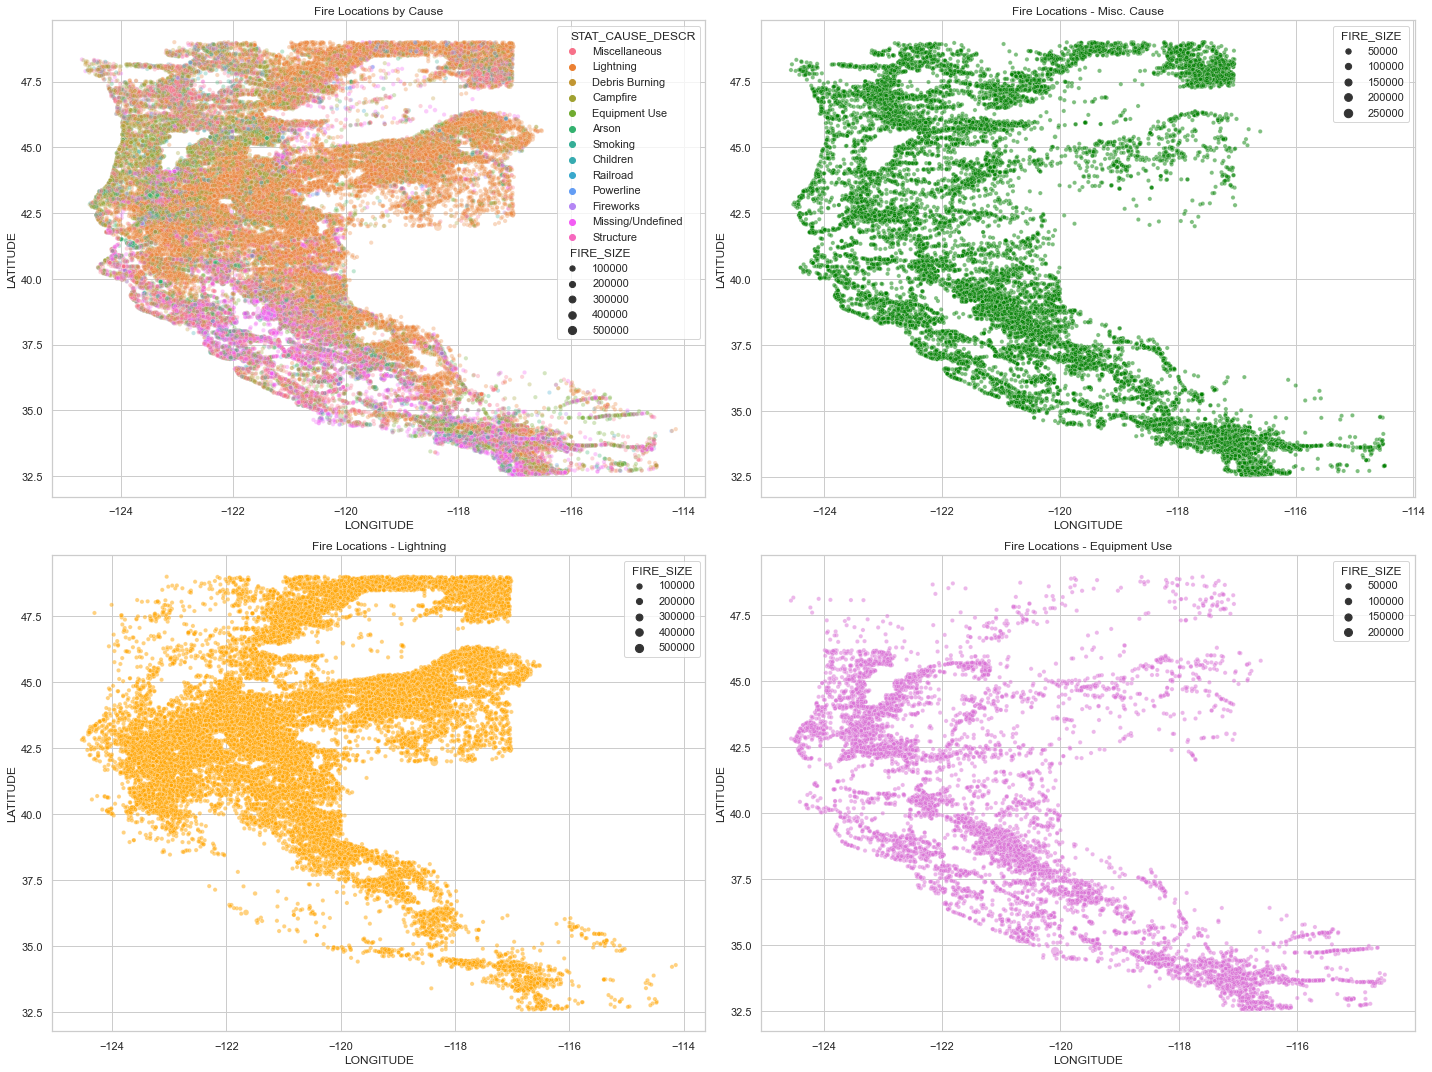

In [33]:
#geo plots of the top 3 causes
fig,axs = plt.subplots(2,2,figsize = (20,15))

sns.scatterplot(data=df_FIPS, x="LONGITUDE", y="LATITUDE", hue="STAT_CAUSE_DESCR", alpha=.3, size="FIRE_SIZE", ax=axs[0, 0]).set(title='Fire Locations by Cause')  
sns.scatterplot(data=df_FIPS[df_FIPS['STAT_CAUSE_DESCR']=='Miscellaneous'], x="LONGITUDE", y="LATITUDE", color = 'green' , alpha=.5, size="FIRE_SIZE", ax=axs[0, 1]).set(title='Fire Locations - Misc. Cause') 

sns.scatterplot(data=df_FIPS[df_FIPS['STAT_CAUSE_DESCR']=='Lightning'], x="LONGITUDE", y="LATITUDE", color = 'orange', alpha=.5, size="FIRE_SIZE", ax=axs[1, 0]).set(title='Fire Locations - Lightning') 
sns.scatterplot(data=df_FIPS[df_FIPS['STAT_CAUSE_DESCR']=='Equipment Use'], x="LONGITUDE", y="LATITUDE", color = 'orchid', alpha=.5, size="FIRE_SIZE", ax=axs[1,1]).set(title='Fire Locations - Equipment Use') 

plt.savefig('../../output/figures/FireLocations_FIPS.png', dpi=300)
fig.tight_layout()

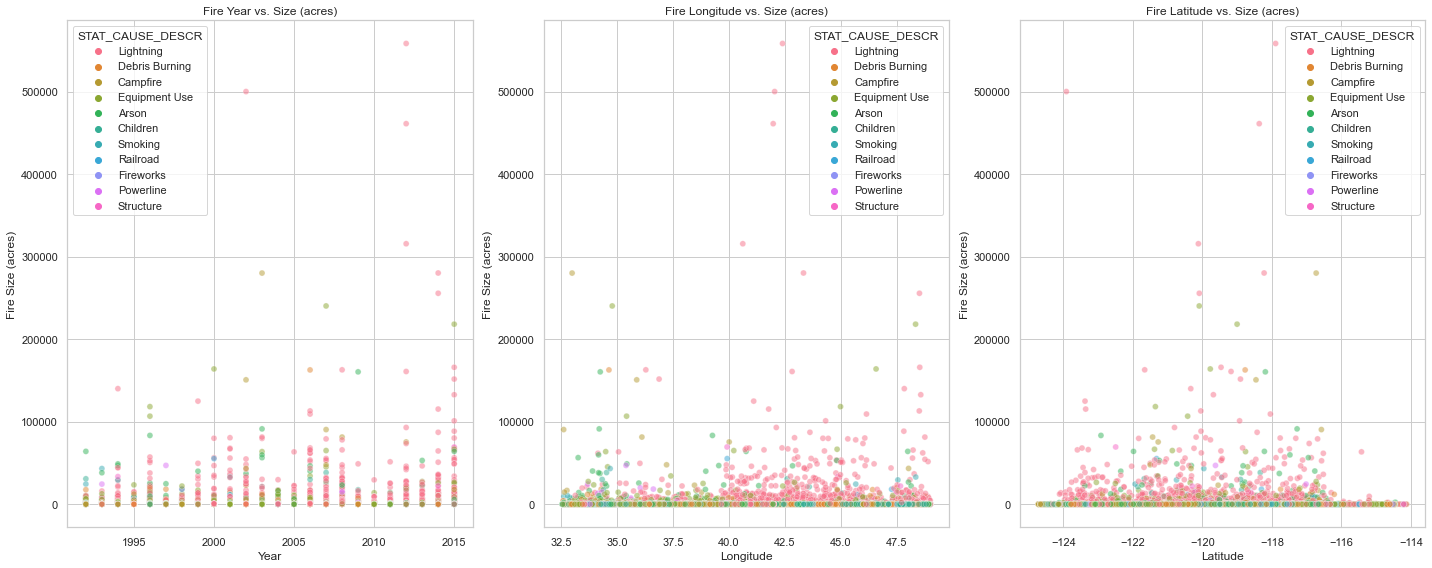

In [21]:
# by fire size.
fig,axs = plt.subplots(1,3, figsize = (20,8))
sns.scatterplot(data=df, x="FIRE_YEAR", y="FIRE_SIZE", hue="STAT_CAUSE_DESCR",alpha=.5, ax=axs[0]).set(title='Fire Year vs. Size (acres)', xlabel='Year', ylabel='Fire Size (acres)')                     
sns.scatterplot(data=df, x="LATITUDE", y="FIRE_SIZE", hue="STAT_CAUSE_DESCR", alpha=.5, ax=axs[1]).set(title='Fire Longitude vs. Size (acres)', xlabel='Longitude', ylabel='Fire Size (acres)')          
sns.scatterplot(data=df, x="LONGITUDE", y="FIRE_SIZE", hue="STAT_CAUSE_DESCR", alpha=.5, ax=axs[2]).set(title='Fire Latitude vs. Size (acres)', xlabel='Latitude', ylabel='Fire Size (acres)')   

plt.savefig('../../output/figures/FireSizeScatter.png', dpi=300)
fig.tight_layout()

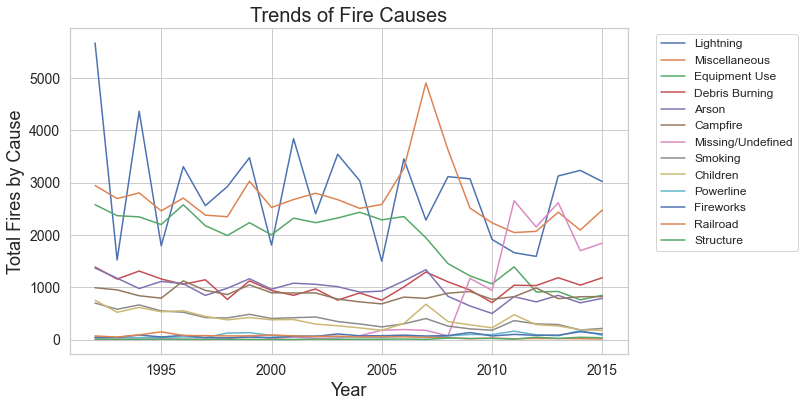

In [37]:
# Yearly time series of causes of fire in the US

# Getting the unique years and fire causes in the final data set
years = sorted(list(df['FIRE_YEAR'].unique()))
fire_causes = list(df['STAT_CAUSE_DESCR'].value_counts().index)

# Empty DataFrame to fill iteratively
MW_fire_causes = pd.DataFrame({
    'Year': years,
    'Miscellaneous': np.zeros(24),
    'Missing/Undefined': np.zeros(24),
    'Lightning': np.zeros(24),
    'Debris Burning': np.zeros(24),
    'Arson': np.zeros(24),
    'Equipment Use': np.zeros(24),
    'Campfire': np.zeros(24),
    'Smoking': np.zeros(24),
    'Children': np.zeros(24),
    'Powerline': np.zeros(24),
    'Fireworks': np.zeros(24),
    'Railroad': np.zeros(24),
    'Structure': np.zeros(24),
})

# Iterating through years and causes, saving the number of fire causes per year to DataFrame
idx = 0
for yr in years:
    for cause in fire_causes:
        cause_value_count = df[(df['FIRE_YEAR'] == yr) & (df['STAT_CAUSE_DESCR'] == cause)].shape[0]
        MW_fire_causes.loc[idx, cause] = cause_value_count
    idx += 1

# Plotting time-series line plots for causes
plt.figure(figsize=(10,6))

for cause in fire_causes:
    sns.lineplot(data=MW_fire_causes, x='Year', y=cause)

plt.title('Trends of Fire Causes', size=20)
plt.legend(fire_causes, fontsize=12, bbox_to_anchor=(1.04, 1))
plt.ylabel('Total Fires by Cause', size=18)
plt.yticks(size=14)
plt.xlabel('Year', size=18)
plt.xticks(size=14)

plt.savefig('../../output/figures/FireCausesPerYear.png', dpi=300)
plt.show()

the Misssing/Undefined cause jumps in the late 2000s, this is curious. We will be removing the Missing/Undefined category as this is not something we wish to predict.

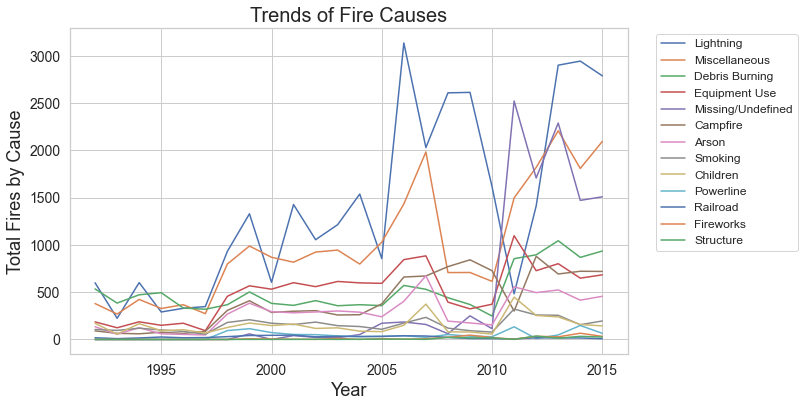

In [40]:
# Yearly time series of causes of fire in the US

# Getting the unique years and fire causes in the final data set
years = sorted(list(df_FIPS['FIRE_YEAR'].unique()))
fire_causes = list(df_FIPS['STAT_CAUSE_DESCR'].value_counts().index)

# Empty DataFrame to fill iteratively
MW_fire_causes = pd.DataFrame({
    'Year': years,
    'Miscellaneous': np.zeros(24),
    'Missing/Undefined': np.zeros(24),
    'Lightning': np.zeros(24),
    'Debris Burning': np.zeros(24),
    'Arson': np.zeros(24),
    'Equipment Use': np.zeros(24),
    'Campfire': np.zeros(24),
    'Smoking': np.zeros(24),
    'Children': np.zeros(24),
    'Powerline': np.zeros(24),
    'Fireworks': np.zeros(24),
    'Railroad': np.zeros(24),
    'Structure': np.zeros(24),
})

# Iterating through years and causes, saving the number of fire causes per year to DataFrame
idx = 0
for yr in years:
    for cause in fire_causes:
        cause_value_count = df_FIPS[(df_FIPS['FIRE_YEAR'] == yr) & (df_FIPS['STAT_CAUSE_DESCR'] == cause)].shape[0]
        MW_fire_causes.loc[idx, cause] = cause_value_count
    idx += 1

# Plotting time-series line plots for causes
plt.figure(figsize=(10,6))

for cause in fire_causes:
    sns.lineplot(data=MW_fire_causes, x='Year', y=cause)

plt.title('Trends of Fire Causes', size=20)
plt.legend(fire_causes, fontsize=12, bbox_to_anchor=(1.04, 1))
plt.ylabel('Total Fires by Cause', size=18)
plt.yticks(size=14)
plt.xlabel('Year', size=18)
plt.xticks(size=14)

plt.savefig('../../output/figures/FireCausesPerYear_FIPS.png', dpi=300)
plt.show()

Filtering the FIPS removed a lot of data from older data. This may be harmful when using year to predict the cause

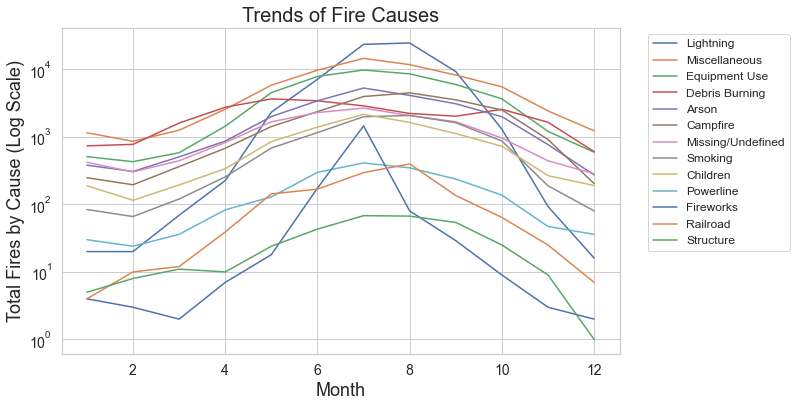

In [38]:
# Monthly time series of causes of fire in the US

months = [x for x in range(1,13)]

# Empty DataFrame to fill iteratively
MW_fire_causes_months = pd.DataFrame({
    'Month': months,
    'Miscellaneous': np.zeros(12),
    'Missing/Undefined': np.zeros(12),
    'Lightning': np.zeros(12),
    'Debris Burning': np.zeros(12),
    'Arson': np.zeros(12),
    'Equipment Use': np.zeros(12),
    'Campfire': np.zeros(12),
    'Smoking': np.zeros(12),
    'Children': np.zeros(12),
    'Powerline': np.zeros(12),
    'Fireworks': np.zeros(12),
    'Railroad': np.zeros(12),
    'Structure': np.zeros(12),
})

# Iterating through months and causes, saving the number of fire causes per year to DataFrame
idx = 0
for mn in months:
    for cause in fire_causes:
        cause_value_count = df[(df['DISC_MONTH'] == mn) & (df['STAT_CAUSE_DESCR'] == cause)].shape[0]
        MW_fire_causes_months.loc[idx, cause] = cause_value_count
    idx += 1

# Plotting time-series line plots for causes
plt.figure(figsize=(10,6))

for cause in fire_causes:
    sns.lineplot(data=MW_fire_causes_months, x='Month', y=cause)

plt.title('Trends of Fire Causes', size=20)
plt.legend(fire_causes, bbox_to_anchor=(1.04, 1), fontsize=12)
plt.ylabel('Total Fires by Cause (Log Scale)', size=18)
plt.yticks(size=14)
plt.yscale('log')
plt.xlabel('Month', size=18)
plt.xticks(size=14)

plt.savefig('../../output/figures/FireCausesPerMonth.png', dpi=300)
plt.show()

A clear Fireworks cause spike at the beginning of July.

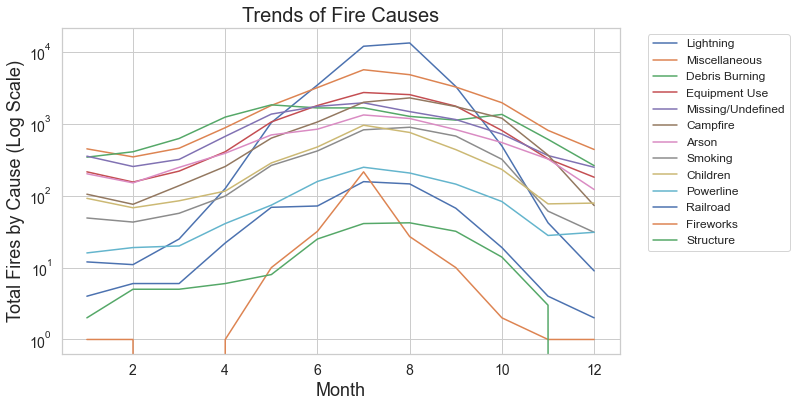

In [41]:
# Monthly time series of causes of fire in the US

months = [x for x in range(1,13)]

# Empty DataFrame to fill iteratively
MW_fire_causes_months = pd.DataFrame({
    'Month': months,
    'Miscellaneous': np.zeros(12),
    'Missing/Undefined': np.zeros(12),
    'Lightning': np.zeros(12),
    'Debris Burning': np.zeros(12),
    'Arson': np.zeros(12),
    'Equipment Use': np.zeros(12),
    'Campfire': np.zeros(12),
    'Smoking': np.zeros(12),
    'Children': np.zeros(12),
    'Powerline': np.zeros(12),
    'Fireworks': np.zeros(12),
    'Railroad': np.zeros(12),
    'Structure': np.zeros(12),
})

# Iterating through months and causes, saving the number of fire causes per year to DataFrame
idx = 0
for mn in months:
    for cause in fire_causes:
        cause_value_count = df_FIPS[(df_FIPS['DISC_MONTH'] == mn) & (df_FIPS['STAT_CAUSE_DESCR'] == cause)].shape[0]
        MW_fire_causes_months.loc[idx, cause] = cause_value_count
    idx += 1

# Plotting time-series line plots for causes
plt.figure(figsize=(10,6))

for cause in fire_causes:
    sns.lineplot(data=MW_fire_causes_months, x='Month', y=cause)

plt.title('Trends of Fire Causes', size=20)
plt.legend(fire_causes, bbox_to_anchor=(1.04, 1), fontsize=12)
plt.ylabel('Total Fires by Cause (Log Scale)', size=18)
plt.yticks(size=14)
plt.yscale('log')
plt.xlabel('Month', size=18)
plt.xticks(size=14)

plt.savefig('../../output/figures/FireCausesPerMonth_FIPS.png', dpi=300)
plt.show()

no fireworks in march, structure is also 0 in december. 

#### Dropping Misc/unknown fire causes from target
Training our model to identify "unknown" is the opposite of our goal. Let's remove all the unknown targets. At the end we can even use these as unlabeled set!

In [18]:
df = df[~df['STAT_CAUSE_DESCR'].isin(['Miscellaneous', 'Missing/Undefined'])]
df_FIPS = df_FIPS[~df_FIPS['STAT_CAUSE_DESCR'].isin(['Miscellaneous', 'Missing/Undefined'])]

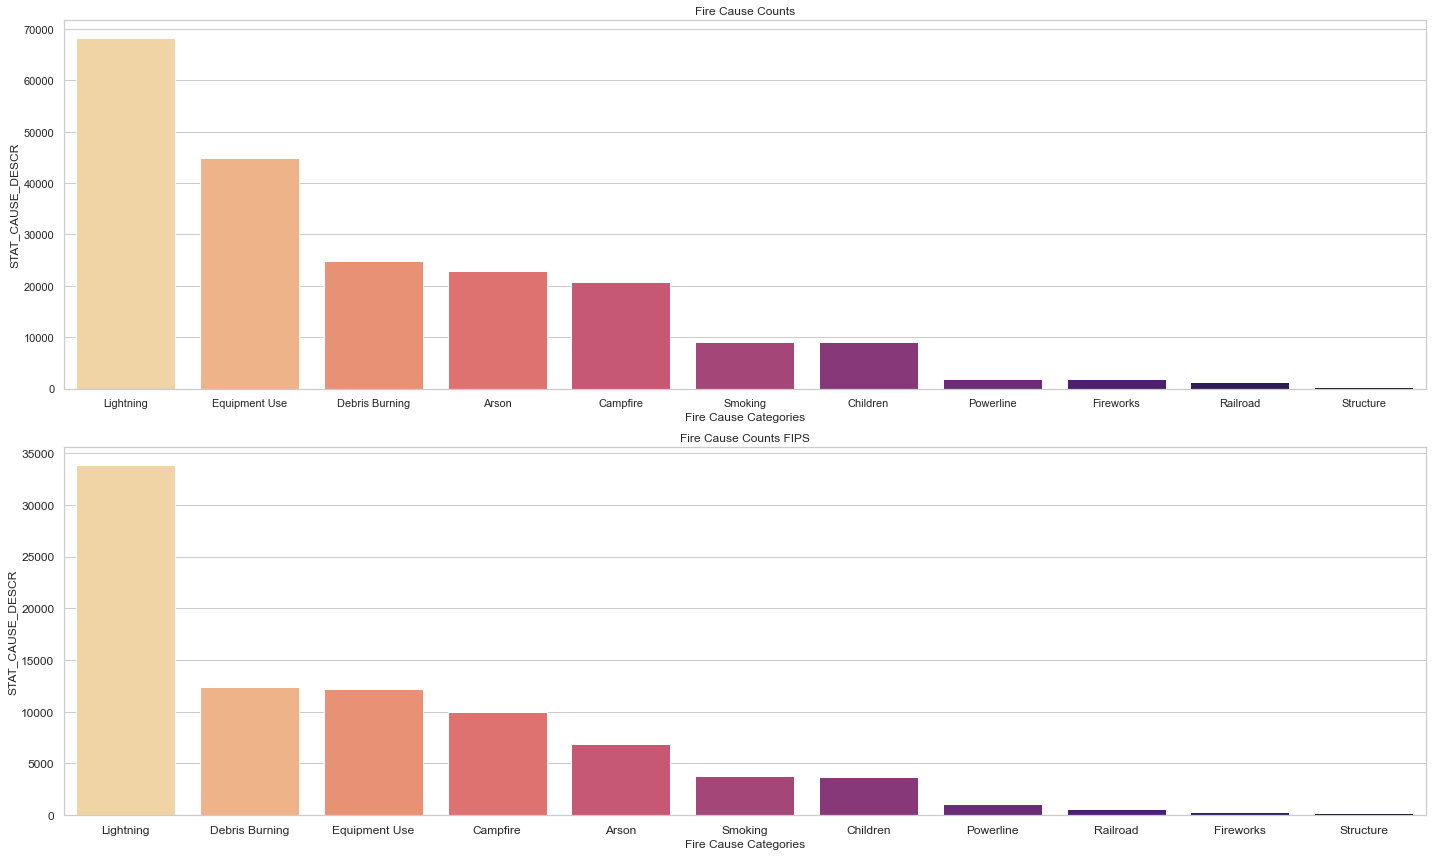

In [20]:
# Bar plot for new classes
cause_counts_full = pd.DataFrame(df['STAT_CAUSE_DESCR'].value_counts().reset_index(drop=False))
cause_counts_full_FIPS = pd.DataFrame(df_FIPS['STAT_CAUSE_DESCR'].value_counts().reset_index(drop=False))

fig,axs = plt.subplots(2,1, figsize = (20,12))

sns.barplot(x='index', y='STAT_CAUSE_DESCR', data=cause_counts_full, palette='magma_r', ax=axs[0]).set(title='Fire Cause Counts', xlabel='Fire Cause Categories')
sns.barplot(x='index', y='STAT_CAUSE_DESCR', data=cause_counts_full_FIPS, palette='magma_r', ax=axs[1]).set(title='Fire Cause Counts FIPS', xlabel='Fire Cause Categories')
plt.yticks(size=12)
plt.xticks(size=12)
plt.tight_layout()
#plt.savefig('../../output/figures/FireCauseCounts_FIPS.png', dpi=300)
plt.show()

### Target Imbalance

It is clear that there is an imbalance in our dataset. There are also 12 target categories, this is high. It may be more efficient to bin the targets into 3 categories.

Natural, accidental, malicious where:
* natural = ['Lightning'] 
* accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning'] 
* malicious = ['Arson'] 

In [22]:
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    else:
        cause = 3
    return cause

In [23]:
df['LABEL'] = df['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x))
df.drop('STAT_CAUSE_DESCR',axis=1, inplace = True)

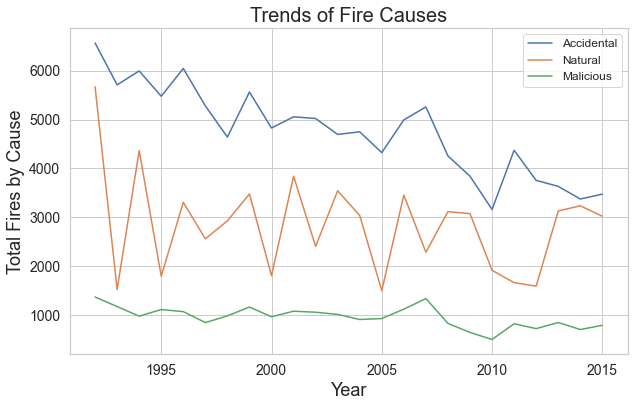

In [27]:
# Yearly time series of causes of fire in the US

# Getting the unique years and fire causes in the final data set
years = sorted(list(df['FIRE_YEAR'].unique()))
fire_causes = list(df['LABEL'].value_counts().index)

# Empty DataFrame to fill iteratively
MW_fire_causes = pd.DataFrame({
    'Year': years,
    1: np.zeros(24),
    2: np.zeros(24),
    3: np.zeros(24)
})

# Iterating through years and causes, saving the number of fire causes per year to DataFrame
idx = 0
for yr in years:
    for cause in fire_causes:
        cause_value_count = df[(df['FIRE_YEAR'] == yr) & (df['LABEL'] == cause)].shape[0]
        MW_fire_causes.loc[idx, cause] = cause_value_count
    idx += 1

# Plotting time-series line plots for causes
plt.figure(figsize=(10,6))

for cause in fire_causes:
    sns.lineplot(data=MW_fire_causes, x='Year', y=cause)

plt.title('Trends of Fire Causes', size=20)
plt.legend(['Accidental', 'Natural', 'Malicious'], fontsize=12)
plt.ylabel('Total Fires by Cause', size=18)
plt.yticks(size=14)
plt.xlabel('Year', size=18)
plt.xticks(size=14)

plt.savefig('../../output/figures/FireCausesPerYear_3Cause.png', dpi=300)
plt.show()

In [24]:
df_FIPS['LABEL'] = df_FIPS['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x))
df_FIPS.drop('STAT_CAUSE_DESCR',axis=1, inplace = True)

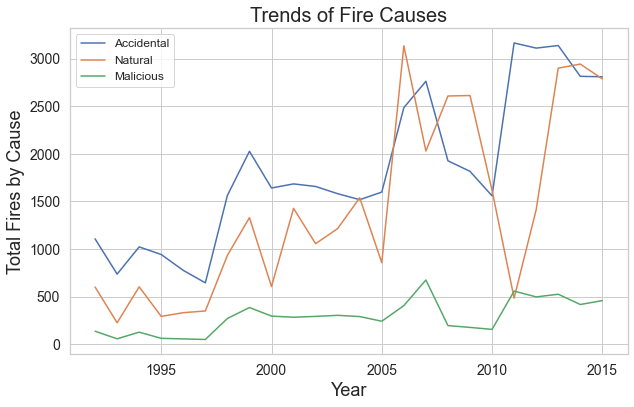

In [28]:
# Yearly time series of causes of fire in the US

# Getting the unique years and fire causes in the final data set
years = sorted(list(df_FIPS['FIRE_YEAR'].unique()))
fire_causes = list(df_FIPS['LABEL'].value_counts().index)

# Empty DataFrame to fill iteratively
MW_fire_causes = pd.DataFrame({
    'Year': years,
    1: np.zeros(24),
    2: np.zeros(24),
    3: np.zeros(24)
})

# Iterating through years and causes, saving the number of fire causes per year to DataFrame
idx = 0
for yr in years:
    for cause in fire_causes:
        cause_value_count = df_FIPS[(df_FIPS['FIRE_YEAR'] == yr) & (df_FIPS['LABEL'] == cause)].shape[0]
        MW_fire_causes.loc[idx, cause] = cause_value_count
    idx += 1

# Plotting time-series line plots for causes
plt.figure(figsize=(10,6))

for cause in fire_causes:
    sns.lineplot(data=MW_fire_causes, x='Year', y=cause)

plt.title('Trends of Fire Causes', size=20)
plt.legend(['Accidental', 'Natural', 'Malicious'], fontsize=12)
plt.ylabel('Total Fires by Cause', size=18)
plt.yticks(size=14)
plt.xlabel('Year', size=18)
plt.xticks(size=14)

plt.savefig('../../output/figures/FireCausesPerYear_3Cause_FIPS.png', dpi=300)
plt.show()

Well this looks much less predictable than the full data set. I will have to keep this in mind as part of my tradeoff to gain the weather data.

#### Correlation heatmap

<AxesSubplot:>

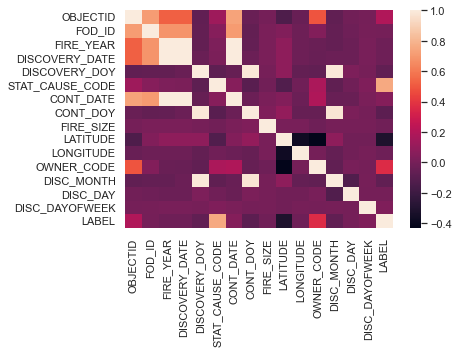

In [29]:
corr = df.corr()
sns.heatmap(corr, annot=False)

<AxesSubplot:>

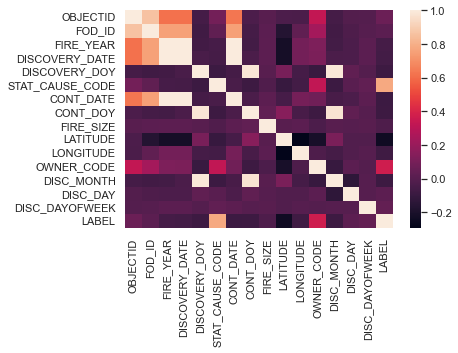

In [30]:
corr = df_FIPS.corr()
sns.heatmap(corr, annot=False)

## Save Dataset

In [34]:
df.to_csv('../../data/fires_EDA.csv') 
df_FIPS.to_csv('../../data/fires_FIPS_EDA.csv') 